In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import Functions as f

In [25]:
data = pd.read_csv('data/microchips.csv').to_numpy()
np.random.shuffle(data)
x = data [:, :2]
y = data [:, 2]

x1 = data[:, 0]
x2 = data[:, 1]


1. Use Logistic regression and mapFeatures from the previous exercise to construct nine
different classifiers, one for each of the degrees d 2 [1; 9], and produce a figure containing a
3x3 pattern of subplots showing the corresponding decision boundaries. Make sure that
you pass the argument C=10000.


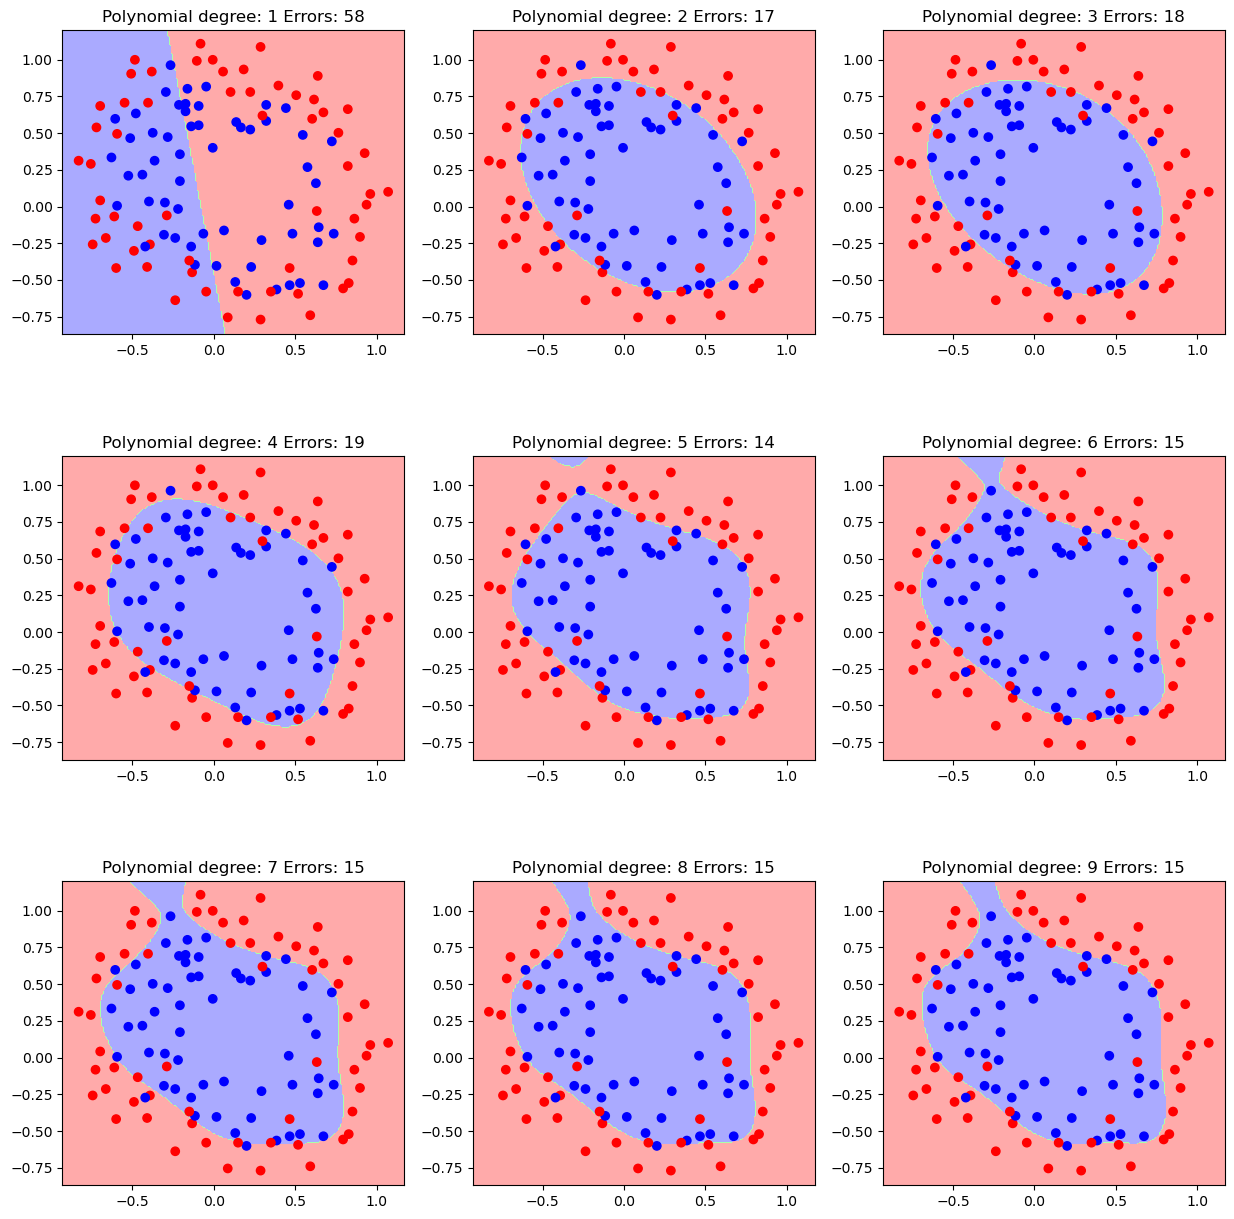

In [26]:
from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
h = .01
x_min, x_max = x1.min() - 0.1, x1.max() + 0.1
y_min, y_max = x2.min() - 0.1, x2.max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
x1_mesh, x2_mesh = xx.ravel(), yy.ravel()
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.4)
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]
for i in range(len(axes)):
    Xe = f.mapFeature(x1, x2, i+1, ones=False)
    logReg = LogisticRegression(solver='lbfgs', C=10000, tol=1e-6, max_iter=10000)
    logReg.fit(Xe, y)
    y_pred = logReg.predict(Xe)
    Xe_mesh = f.mapFeature(x1_mesh, x2_mesh, i+1, ones=False)
    errors = np.sum(y_pred != y)
    Z = logReg.predict(Xe_mesh)
    Z = Z.reshape(xx.shape)
    axes[i].contourf(xx, yy, Z, cmap=cmap_light)
    axes[i].scatter(x1, x2, c=y, cmap=cmap_bold)
    axes[i].set_title('Polynomial degree: ' + str(i+1) + ' Errors: ' + str(errors))


2. Redo 1) but now use the regularization parameter C = 1. What is different than from the
step in 1)?


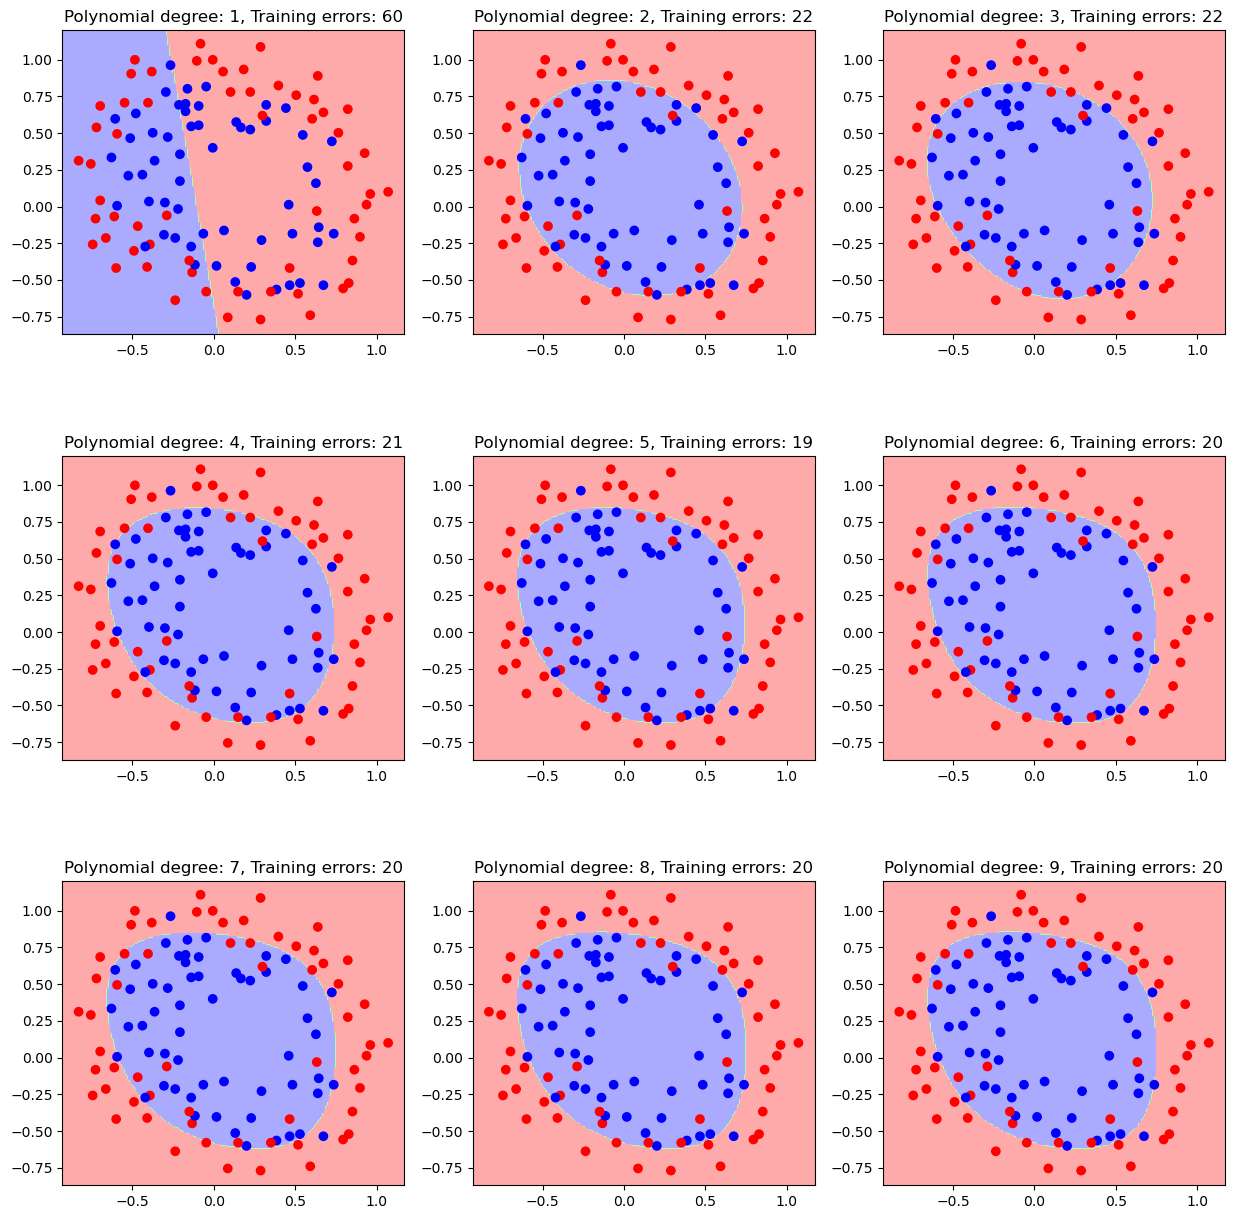

In [27]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
h = .01
x_min, x_max = x1.min() - 0.1, x1.max() + 0.1
y_min, y_max = x2.min() - 0.1, x2.max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
x1_mesh, x2_mesh = xx.ravel(), yy.ravel()
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.4)
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]
for i in range(len(axes)):
    Xe = f.mapFeature(x1, x2, i+1, ones=False)
    logReg = LogisticRegression(solver='lbfgs', C=1, tol=1e-6, max_iter=10000)
    logReg.fit(Xe, y)
    y_pred = logReg.predict(Xe)
    Xe_mesh = f.mapFeature(x1_mesh, x2_mesh, i+1, ones=False)
    errors = np.sum(y_pred != y)
    Z = logReg.predict(Xe_mesh)
    Z = Z.reshape(xx.shape)
    axes[i].contourf(xx, yy, Z, cmap=cmap_light)
    axes[i].scatter(x1, x2, c=y, cmap=cmap_bold)
    axes[i].set_title('Polynomial degree: ' + str(i+1) + ', Training errors: ' + str(errors))

- With higher regularization values (the lower the C, the higher the regularization), the decision boundary is smoother and less complex. This is because the model is penalized for having a complex decision boundary, and therefore the model is forced to generalize better. This also explains why there are a lot more training errors with higher regularization values.

3. Finally, you should use cross-validation (in sklearn) to see which of the regularized and
unregularized models performs best. The results could for instance be visualized in a graph
where you plot the degree d vs. #errors, and differentiate regularized and unregularized
by color.

Best high C degree:  2
Best low C degree:  4


Text(0.5, 1.0, 'Degree vs Precision')

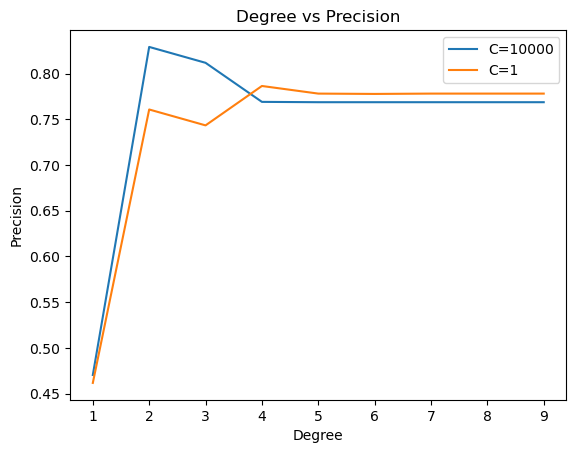

In [28]:
from sklearn.model_selection import cross_val_score

degrees = np.arange(1, 10)
precision_list_highC = []
for i in degrees:
    Xe = f.mapFeature(x1, x2, i, ones=False)
    logReg = LogisticRegression(solver='lbfgs', C=10000, tol=1e-6, max_iter=5000)
    precision = cross_val_score(logReg, Xe, y, cv=5, scoring='accuracy').mean()
    precision_list_highC.append(precision)

precision_list_lowC = []
for i in degrees:
    Xe = f.mapFeature(x1, x2, i, ones=False)
    logReg = LogisticRegression(solver='lbfgs', C=1, tol=1e-6, max_iter=5000)
    precision = cross_val_score(logReg, Xe, y, cv=5, scoring='accuracy').mean()
    precision_list_lowC.append(precision)

# choose the best degree
best_degree_highC = np.argmax(precision_list_highC) + 1
print("Best high C degree: " , str(best_degree_highC))
best_degree_lowC = np.argmax(precision_list_lowC) + 1
print("Best low C degree: ", str(best_degree_lowC))

# plot the results, degree vs #errors
plt.plot(degrees, precision_list_highC, label='C=10000')
plt.plot(degrees, precision_list_lowC, label='C=1')
plt.legend()
plt.xlabel('Degree')
plt.ylabel('Precision')
plt.title('Degree vs Precision')